In [1]:
# RNN, 자연어 처리, YOLO, GAN(유사 이미지 생성기술)
# rnn은 순환 신경망으로 표현한다. 입력과 출력을 시퀀스 단위로 처리하는 모델이다. 
# 가령 번역기를 예로 들면 된다. 단어들의 시퀀스로 표현된 문장에서 인풋,
# 번역하고자 하는 문장, 출력, 번역된 문장으로 나올 것이다. 
# RNN은 가장 기본적인 시퀀스 모델이다. RNN의 문제점을 개선한 것이 LSTM이다. 
# 딥러닝의 꽃은 RNN이다. 딥러닝은 예측모델을 만들때 사용되어진다. 
# 과거부터 현재까지 축적된 데이터로 패턴을 찾아내고 미래를 예측하는 작업을 수행한다. 
# 지난 시간에는 기본적인 신경망을 배웠다. 입력 -> 히든레이어 -> 히든레이어... -> 출력
# 순환신경망은 기존의 구조와 다르게 이전 셀에서 출력된 값이 다음셀에도 출력되는 구조이다.
# 바닐라 뉴럴 네트워크가 가장 기본적인 신경망이다. 1입력, 1출력 형식이다.(one to one)
# 나아가 1입력 다출력, 다입력 1출력, 다입력 다출력 방식 등 여러개가 존재한다. 이게 RNN이다. 

# 사진 한장 주고 사진에 등장하는 인물/배경을 보고 사진을 설명한다면 1입력 다출력이다.(one to many)
# 이미지 캡셔닝이라고 한다. 
# 여러 요소를 주문받아서 1개의 사진으로 출력하라는 것. 그것이 다입력 1출력이다.(many to one)
# 감성분석도 여기에 해당된다. 말의 흐름을 보고 긍정적 글인지 부정적 글인지 파악하는 것이다.
# 긍정/부정, 합격/불합격 등 많은 이진분류에 사용된다. 
# 번역기처럼 하나의 문장이 여러단어의 시퀀스라면 그 시퀀스를 다른 언어 시퀀스로 바꾸는 것이 다입력 다출력이다. (many to many)

# 일반 신경망과 차이점이 있다면 히든계층에서 바로 출력으로 가지 않는다. 다른 히든계층으로 간다.
# RNN알고리즘은 시간이 가미된 학습방법이다. 자연어 처리에서 가장 많이 사용된다. 
# 이전의 무슨단어가 나왔는지에 따라 다음단어로 이어지는 예측을 할 수도 있다.
# 히든계층의 RNN버젼을 RNN셀이라고 한다. 히든계층이라고 하지 않는다. 
# 렐루, 소프트맥스, 시그모이드가 사용되었던 기존 딥러닝과 달리 RNN은 tanh가 사용된다. 
# 오늘은 주식예측하는 것을 연습삼아서 만들것이다. many to one으로 될 것이다. 
# 주가를 결정하는 여러 요인들이 투입될 것이다. 정치,경제,사회뉴스, 환율 등 다양한 정보들이 올라갈 것이다.
# many to one구조는 많이 쓰인다. 
# RNN은 순환계층 / 시계열 데이터에 적절한 구조이다. 
# 삼성전자 주가 데이터를 가지고 내일의 종가를 예측하는 모델을 제작 할 것이다. 


In [2]:
# 우리말을 영어로 번역하는데 영어 - 일본어 - 한국어로 번역하는게 품질이 좀 더 좋은 특징이 있다.
# 반대로 말하면 영어 - 일본어 번역이 상대적으로 깔끔하다는 뜻이다. 요즘에는 RNN을 번역용으로 안쓴다. 
# 공부하는 이유는 RNN이 가장 베이스기 때문이다. 다른 딥러닝의 기초가 된 것이 RNN이기 때문이다. 
# RNN의 특징에 대해서는 알아 둘 필요가 있다. GPT도 RNN에서 출발했다.

In [3]:
# 비디오는 찰나의 순간이 여러개가 모여서 만들어졌다. 여러 프레임의 연속모임이다. 
# 비디오를 분류할때도 RNN구조가 활용된다. 
# 금요일에 필기체를 인식할때도 500x150x3이었다. 
# 비디오는 프레임레벨이 모여있다. 만약 300x400x3의 프레임이 1000개라면 1000x300x400x3과 같은 4차원 단위가 된다.
# FPS개념이 있다. 초당 프레임이다. 즉 60프레임은 초당 60개의 프레임이 나온다는 것이다. 
# 유튜브 영상을 해석해서 영화의 주제/특징같은 정보를 이용해서 자동으로 자막을 생성하는 AI를 만드는 연구가 이루어진다.
# RNN은 활용범위가 굉장히 넓다. 

In [4]:
# 시퀀스의 길이 (단어의 길이)에 관계없이 입력과 출력을 할 수 있는 구조이다. 매우 유연하다.
# RNN에 대한 수식은 다음과 같다. 
# h(t) = fW(ht-1,xt)
# 풀어서 쓰면 출력값 = 파라미터 함수(이전상태의 출력값, 입력벡터값)로 표현된다. 
# 그림으로 그리면 다음과 같다.
# 투입      RNN 내부  출력
#          | RNN |
#          | ||  |
# X ------>| RNN |  - > h(t)
#          | ||  |
#          | RNN |
# 
# 즉 RNN 내부에서 이전 출력값을 전달받는 작업도 추가된다. 입력 + 이전값이 RNN의 재료이다. 

In [5]:
# RNN내부의 값은 식으로 나타내면 다음과 같다. 
# ht = tanh(Whh*(ht-1) + Wxh*xt + bh))
# 무슨 소리냐 싶겠지만 다음과 같다.
# 출력값 = 쌍곡탄젠트(이전RNN값 + 인풋값 + 바이어스값)
# 아웃풋은 다음과 같다.
# yt = Why + by 
# 결과값 = 현재의 RNN값 + 또다른 바이어스값
# 한글로 풀어놓으니 좀 살거같다.
# 여기서 투입값의 가중치(w)는 각 요소의 중요도에 따라 다르게 투입된다. 
# 재밌는 것은 다음 RNN셀을 이동할 때 투입되는 인풋은 기본인풋/이전값/백프라퍼케이션이 들어가는 것이다. 
# RNN네트워크를 구성할 때 셀이 여러개가 이어지는 구조로 설계된다. 
# RNN출력시에는 또다른 활성화함수를 연결한다. 또는 F.C(풀리 커넥티드 레이어)가 나오기도 한다.
# 즉 DNN으로 전송하여 2차 딥러닝이 이어지기도 한다.


In [6]:
# 다음 문자가 어떤 식으로 연결되는지 알아보자
# vocabulary : h, e ,l ,o (코퍼스(말뭉치)를 구성하는 전체 단어들의 집합) 문자 4개로 구성되어있다.
# 여기서 이 문자를 기반으로 예측한다면? 문자 4개를 기반으로 다음 문자를 예측하는 모델을 만들고자 한다. 
# h(1,0,0,0),e(0,1,0,0),l(0,0,1,0),l(0,0,1,0),o(0,0,0,1) 출력은 이와 같이 이루어질 것이다. 
# 히든 레이어에는 다음과 같은 과정이 벌어질 것이다.
# 0.3  ---- 1.0 ----  0.1 ---- -0.3    
# -0.1 ---- 0.3 ---- -0.5 ----  0.9
# 0.9  ---- 0.1 ---- -0.3 ----  0.7
#  h        e          l         l
# 이런 식으로 진행될 것이다. (무슨말인지 알 수가 없다)
# 현재는 코퍼스 크기인 4차원 구조이다. 
# 가중치변수는 글자에서 히든레이어로 전달된다. 가중치는 모든 글자에서 공유된다. 
# 히든레이어의 차원은 우리가 정하는 것이다. 

In [ ]:
# 문제점
# RNN은 이미지로부터 이미지 부분을 설명하는 것도 가능하다. 
# RNN은 그럼에도 문제점을 가지고 있다.
# 시계열 데이터를 이용하기에 좋으나 장기의존성 문제가 발생한다. 
# LSTM(long short term memory) 관련 사이트는 다음과 같다.
# https://colah.github.io/posts/2015-08-Understanding-LSTMs/`
# RNN결과는 이전 결과값에도 의존적이다. 또한 짧은 시퀀스에 유용하나 
# 시퀀스가 길어지면 후방의 정보가 앞으로 가지않는 문제가 발생한다. 즉 초기정보의 손실이 발생한다.
# 시점이 많을수록 전체 정보가 영향력을 잃어버릴 수 있다. 결과가 제대로 안나오는 문제가 생길 수 있다.
# 예를 들어 초반에 자신이 프랑스인이라고 말했는데 중간소개가 길어지면 마지막에 소개한 사람이 프랑스인인것을 잊어먹는다.
# 사람은 초반에 프랑스인인것을 인식하고 프랑스어를 할 것이라고 유추하지만 RNN은 그렇지 못하다. 
# 시간이 흐름에 따라 짧은 시퀀스(프랑스인)는 점점 사라지는 것이다. 이게 장기의존성 문제이다.
# RNN은 장기의존성 문제를 피할 수 없다. 
# LSTML구조는 다르다. RNN의 단점을 완하기 위한 구조인데 LSTM의 히든계층에 입력게이트, 망각게이트, 출력게이트를 추가했다.
# 뒷쪽에서 중요하게 사용될 정보를 기억시킨다. 그러한 과정을 히든계층에서 판단하는 것이다. 
# 그래서 수식이 매우 복잡해졌다. 특정상태의 셀을 나타내기도 한다.

# 아쉽게도 그리드서치는 안되는 듯 하다. 설령 된다고 해도 규모가 크기 때문에 그리드서치가 의미가 없는 경우가 많다. 

In [7]:
# LSTM 구조
# LSTM은 긴 시퀀스를 처리하는데 성능이 확연히 좋아졌다. 내부에 시그모이드가 3개나 들어간다. 
# LSTM구조는 다음과 깉이 편성된다.
# 1. 셀 스테이트 : 모든 셀들에 걸쳐서 연결되어져 있는 선이다. 컨베이어 벨트와 유사하다. 
# 정보가 컨베이어벨트를 따라서 계속 이동하는 모양이다. 
# 2. 게이트 : LSTM은 게이트가 여러 개가 존재한다. 구조에 따라 세심하게 조종되는 게이트들이다. 
# 값이 중요하면 다음셀에도 전달하고 중요하지 않으면 제거한다. 만약 그 값이 중요하면 추가할 수도 있다. 
# 정보를 전달하는데 있어서 선택적으로 정보를 전달하는 역할을 한다. 역할은 전부 다르지만 선택적성격이 공통적이다.
# 상황에 맞춰서 선택적으로 정보를 전달하는 것이다. 기억할건 기억하고 잊어버릴건 잊어버린다. 
# 이걸 학습을 통해 훈련을 하면 모델이 만들어지는데 그 와중에 업데이트되는 것이 게이트이다. 
# LSTM에서는 크게 3가지 게이트가 존재한다.
# 시그모이드 레이어 : 시그모이드를 통과하면 값은 0에서 1사이로 바뀐다. 
# 시그모이드에서 X에 곱연산을 하게 된다. 시그모이드가 1이면 전달, 0이면 차단인 식이다. 
# 시그모이드는 전달정보의 양을 조절한다.


In [8]:
#LSTM 작동 매커니즘
# 1. 망각 게이트 : 앞쪽에 있는 모든 셀들의 상태정보를 먼저 받는다. 그것을 0~1사이를 곱한다.
# 전체 정보에 대해서 어느 정도 전달하는지 결정하는 게이트이다. 
# 앞에 있는 단어를 기반으로 다음 단어를 예측하고자 한다. 그러한 언어모델을 만들고자 한다. 
# 셀에 대한 상태값이 만약에 성별이라고 하자. 셀에 대한 상태정보가 성별에 대한 내용을 담고있다면(her, mr)
# 포함된 정보가 정상적으로 전달이 되었다면 올바른 대명사를 사용할 수 있을 것이다. 

# 아예 새로운 주제를 이야기하려고 한다면? 이전의 내용과는 전혀 다른 이야기이다. 이전의 정보는 필요하지 않다. 
# 그렇다면 망각을 할 필요가 존재한다. 어떤 정보를 남겨두고 어떤 정보를 제거할지 결정하는 역할이다. 

# 2.인풋 게이트 레이어 : 어떤 정보를 새롭게 저장할지 결정하는 게이트이다. 입력 게이트라고 한다.
# 현재 정보와 이전정보를 받아서 어느정도 저장할지 결정한다. 
# 셀스테이트에 새로운 정보가 들어왔다. 그 정보는 성별에 대한 정보라고 하자.
# 기존의 정보를 버리고 현재 셀에 저장되는 새로운 정보를 활용하는 게이트이다. 

# 여기까지 과거의 정보(망각 게이트), 현재의 정보(인풋 게이트 레이어)까지 컨베이어 벨트에서 움직인다. 

# 3. 출력 게이트 : 출력을 결정하는 게이트가 있다.
# 출력값은 출력부분 뿐 아니라 다음 망각게이트에도 전달된다. 
# 과거정보, 현재정보를 쌍곡탄젠트로 계산한 것을 현재값에 시그모이드를 취한 값과 곱해서 출력한다.

# LSTM은 순서가 중요하고 과거의 정보가 중요한 경우에 많이 사용된다. 

In [97]:
# LSTM 주가예측 기초
# 파이낸스 리더 파이선 패키지를 이용하자
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import FinanceDataReader as fdr
# 안되면 pip install finance-datareader를 설치해야 한다.
# 야후 파이낸스쪽에서 관심을 가지고있는 종목을 가지고 와보자

In [99]:
kakao = fdr.DataReader('035720') # 카카오 데이터를 가져와보자, 한국데이터는 6자리코드, 미국은 약어로 된다.
kakao.shape

(5921, 6)

In [100]:
kakao # 과거부터 현재까지의 주가를 확인한다. 시가, 고가, 저가, 종가 , 거래량, 대비 순으로 있다.


,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [101]:
fdr.DataReader('AAPL','1981','1982') # 일정 기간을 주는 것도 가능하다. 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1981-12-24,0.097656,0.098214,0.097656,0.097656,0.075668,28918400
1981-12-28,0.094308,0.094308,0.093192,0.093192,0.072209,36579200
1981-12-29,0.094866,0.095982,0.094866,0.094866,0.073506,24236800


In [102]:
fdr.DataReader('AAPL','1981-01-01','1982-12-30') # 날짜도 기입 가능하다.
#  https://github.com/FinanceData/FinanceDataReader 여기에 많은 자료들이 있다. 하단에 목차가 존재한다.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-12-22,0.135603,0.138951,0.135603,0.138951,0.107665,101225600
1982-12-23,0.138951,0.142857,0.137835,0.142857,0.110692,86979200
1982-12-27,0.142857,0.146763,0.141741,0.146205,0.113286,61868800


In [103]:
kakao.index # 날짜가 인덱스이다. datetime으로 되어있어서 마음껏 쪼개는 것이 가능하다. 

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [104]:
kakao['year'] = kakao.index.year    # 연도, 월, 일도 추출 가능하다. 
kakao['month'] = kakao.index.month  
kakao['day'] = kakao.index.day

Text(0, 0.5, 'price')

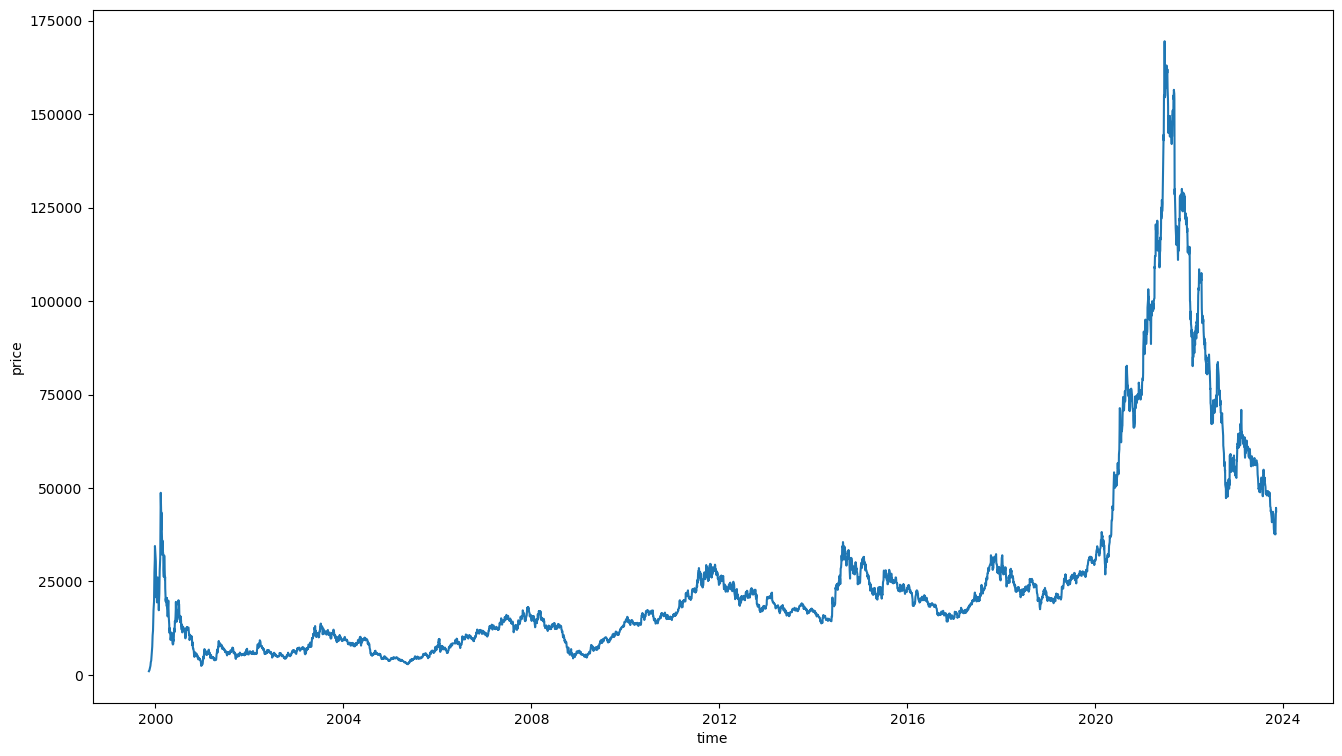

In [105]:
# 기간이 너무 길어서 선 그래프로 그려야 할 듯 하다. 
plt.figure(figsize = (16,9))
sns.lineplot(y = kakao['Close'],x = kakao.index)
plt.xlabel('time')
plt.ylabel('price')
# 꽤 보기 어렵다. 너무 많은 기간을 보기 때문이다. 
# 연도별로 나눠서 보는 것도 필요할 것이다. 

In [106]:
ts = [['2000','2010'],
      ['2010','2015'],
      ['2015','2020'],
      ['2020','2023']]

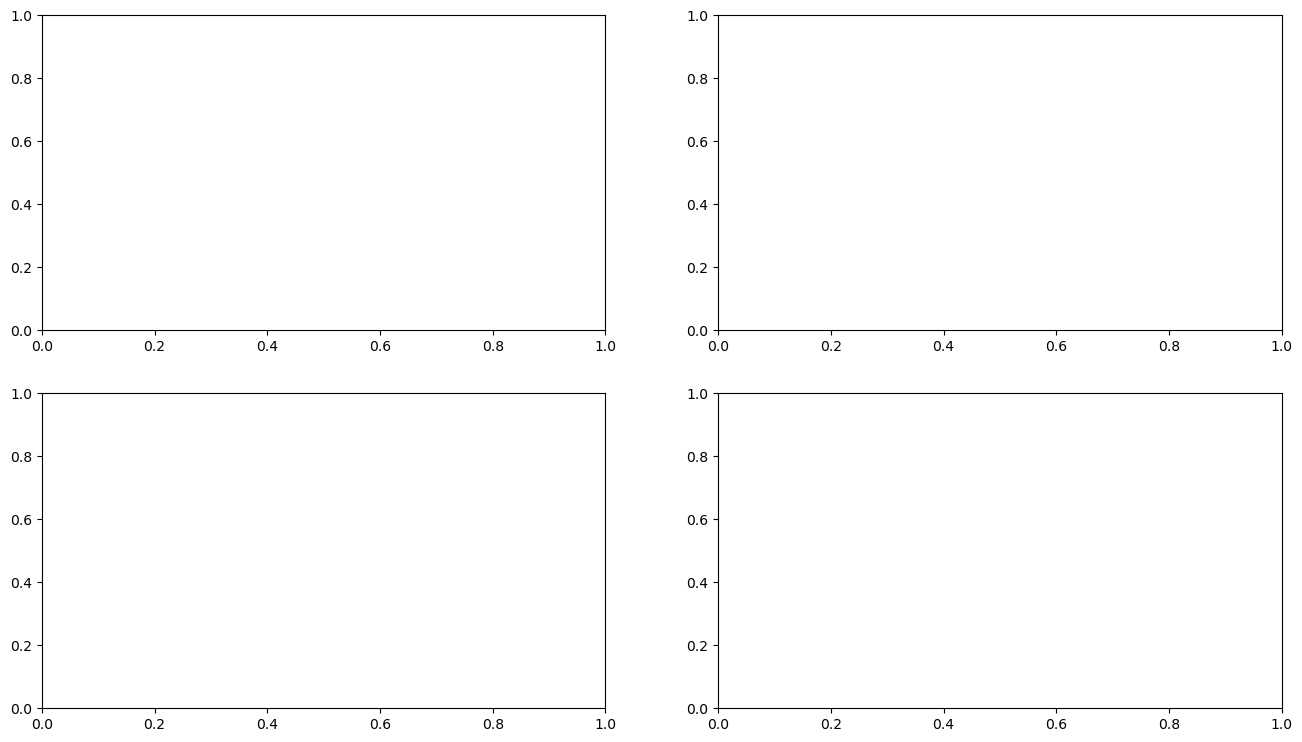

In [107]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(16,9)     # 깔끔한 도화지가 만들어졌다.

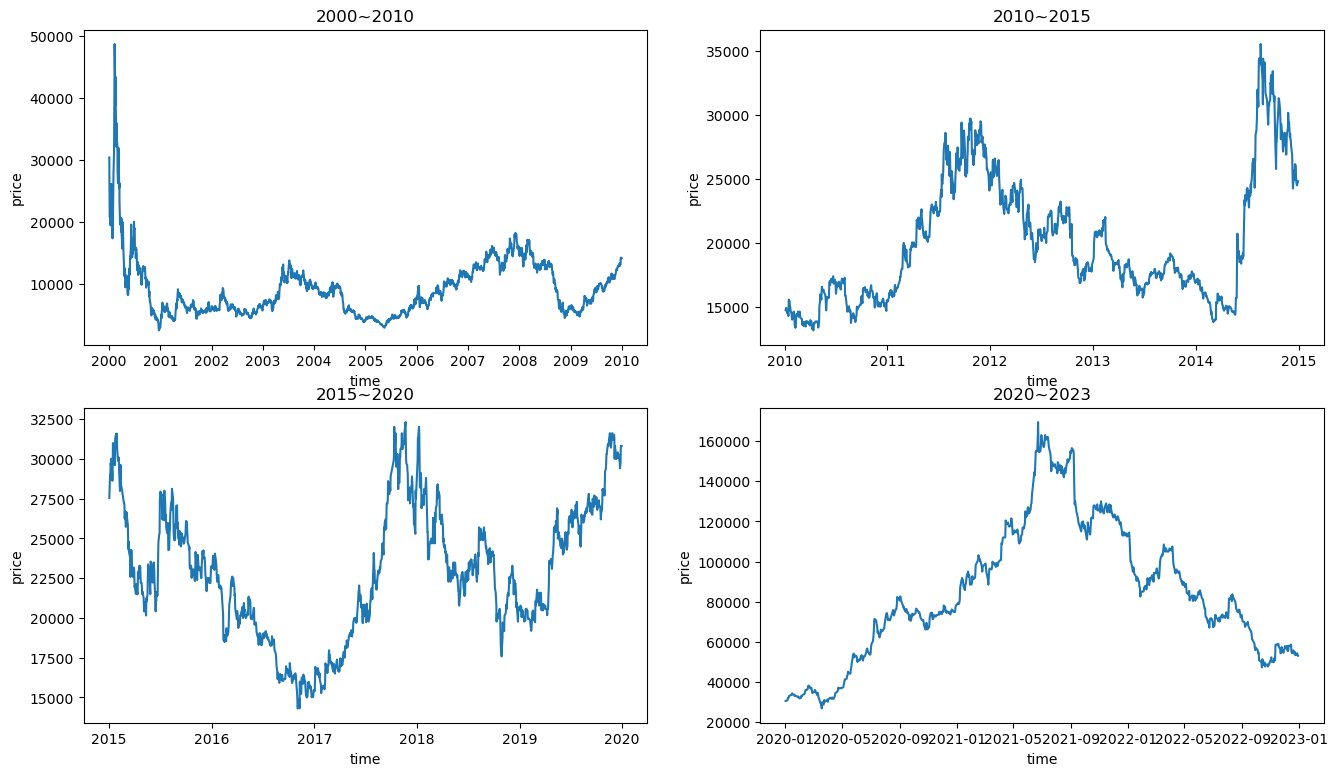

In [108]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(16,9)    
for i in range(4):
    ax = axes[i//2, i%2]                                                    # 0 = (0,0), 1 = (0,1), 2(1,0),3,(1,1)
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]      # 인덱스별 해당위치 자르기
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)                          # 라인플롯은 close를 기준으로
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')                                  # 타이틀 이름은 위에 있는 이름으로 사용
    ax.set_xlabel('time')
    ax.set_ylabel('price')

In [109]:
# volume은 정규화, 표준화작업이 필요할 것이다. 폭이 상당히 크다. 
# 종가를 설계하려면 어떻게 해야할까? 전날것만 예측하는 것은 무리일 것이다. 
# 특정 기간동안의 특정 데이터를 기반으로 확인해야 할 것이다. 
# 3일 동안의 주가데이터의 변화를 기준으로 하면 11월 1~11월 3일이 x이다.  11.6이 타겟이다. 
# 이걸 박스단위로 묶어서 조사하는 것이다. 윈도우 슬라이딩 방식이다. 
# 이걸 트레이닝을 한다면 맨 위의 3일데이터를 기준으로 결국 6일 종가 하나만 출력해야한다. 
# 애러를 줄이기 위해서 백프라퍼게이션을 계속 하게 된다. 이러한 구조로 수행하는 것이다. 
# 일단 날짜는 중요하지 않을 것이다. 날짜가 오르는 기준이 된다면 이미 많은 사람들이 돈을 벌었을 것이다. 
# minmaxscaler를 통해 정규화를 해보자. 
# 투자를 한다면 일반적으로 강화학습을 많이 한다. 
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()  

In [111]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [112]:
scaled = scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.58381503e-01, 2.62732919e-01, 2.59351577e-01,
        2.57792688e-01],
       [2.59883721e-01, 2.58670520e-01, 2.66149068e-01, 2.53713628e-01,
        1.06832400e-01]])

In [113]:
df = pd.DataFrame(scaled, columns=cols)
df
# 모든 값들은 정규화되었다. 
# 원리 자체는 간단하다. 시고저, 거래량 4개의 정보를 이용하여 종가를 추출한다.
# 여기서 마지막날에 해당하는 날에 종가를 출력하는 식이다.
# 만약 잘 안될 경우 백프라퍼게이션을 진행하여 재구성한다. 
# 사실상 예측을 하는데 3일간의 데이터만 반복해서 사용하는 것이다. 
# 정확도는 적어도 20일 정도까지 하는 것이 적정할 것이다. 
# 윈도우 단위로 데이터를 나누는 것이 선행되어야 한다. 

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",axis = 1),df['Close'], test_size=0.2, random_state=0, shuffle=False) # 시간의 흐름이기 때문에 셔플옵션을 꺼야한다. 

In [116]:
xtrain.shape # 분리가 잘 된거 같다. 

(4736, 4)

In [117]:
xtest.shape

(1185, 4)

In [ ]:
# RNN 이용 주가예측

In [118]:
def make_dataset(data, label, window_size=20):                   # 데이터셋 제작함수 윈도우사이즈는 타임스텝이다. 
    feature_list = []                                            # 요소리스트
    label_list = []                                              # 라벨리스트
    for i in range(len(data) - window_size):                     # 데이터 길이에 윈도우의 길이만큼 뺀다. 4716번 반복된다.  
        feature_list.append(np.array(data.iloc[i:i+window_size]))# 현재부터 20일까지의 해당 날짜의 시고저종*20일치를 배열화한다.
        label_list.append(np.array(label.iloc[i+window_size]))   # 라벨은 20일째의 종가를 담아서 배열화하여 리스트에 넣는다. 
    return np.array(feature_list), np.array(label_list)          # 즉 4716개의 20*4를 리턴하고 답도 4716개를 리턴한다. 

In [119]:
xtrain, ytrain = make_dataset(xtrain, ytrain, 20)

In [122]:
xtrain.shape # 윈도우 사이즈를 20으로 실행한다. 

(4716, 20, 4)

In [126]:
ytrain.shape # 20일 마지막의 가격을 나타낸다. 

0.050201482483783484

In [128]:
ytrain = ytrain.reshape(ytrain.shape[0],1)

In [130]:
ytrain.shape

(4716, 1)

In [131]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [133]:
xtest.shape

(1165, 20, 4)

In [135]:
ytest.shape

(1165,)

In [138]:
ytest = ytest.reshape(ytest.shape[0],1)
ytest.shape

(1165, 1)

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
# lstm모델도 불러오자

In [140]:
model = Sequential()

In [142]:
model.add(LSTM(16, input_shape=(xtrain.shape[1],xtrain.shape[2]), 
              activation = 'relu',
              return_sequences=False))

# 임베딩은 필요없다. 글자가 아니기 때문이다.
# 인풋모양은 윈도우모양인 20*4를 적으면 된다. 
# 출력결과는 1개가 나와야 한다. 

In [143]:
model.add(Dense(1))
# 만약 범주형이면 소프트맥스를 쓸 것이고 불연산값으로 보낸다면 시그모이드를 쓰면 된다.
# 하지만 여기는 주가다. 리니어를 써야한다. 
# 그런데 리니어는 액티베이션 디폴트다. 기본적으로 설정되어있다. 

In [145]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1344      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
model.compile(loss='mean_squared_error', optimizer='adam')        # 모델 컴파일 / 연속형값을 예측하기에 mse를 쓴다. 
early_stop = EarlyStopping(monitor='val_loss', patience=5)        # 벨로스는 다음과 같이 설정한다. 5번 체크한다. 
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto') # 모델 체크포인트는 다음과 같다. 
# 오토는 추측에서 알아서 시행하라는 뜻이다. 컴퓨터에게 권한을 위임하는 것이다. 

In [147]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)
# 문제는 벨류값이 지정되어있지 않다. 벨리데이션 데이터를 따로 넣어야 한다. 
# 위와 같이 벨리데이션 데이터를 따로 투입했다. 

In [149]:
history = model.fit(xtrain, ytrain, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])


Epoch 1/200
234/236 [============================>.] - ETA: 0s - loss: 2.4453e-05
Epoch 1: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.4426e-05 - val_loss: 2.1807e-05
Epoch 2/200
225/236 [===========================>..] - ETA: 0s - loss: 2.5336e-05
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 2.4967e-05 - val_loss: 1.9924e-05
Epoch 3/200
228/236 [===========================>..] - ETA: 0s - loss: 2.3550e-05
Epoch 3: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.4542e-05 - val_loss: 2.0562e-05
Epoch 4/200
224/236 [===========================>..] - ETA: 0s - loss: 2.2529e-05
Epoch 4: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.2555e-05 - val_loss: 2.0548e-05
Epoch 5/200
225/236 [===========================>..] - ET

In [150]:
model.load_weights('tmp_checkpoint.h5')

In [151]:
pred = model.predict(xtest)
pred

37/37 [==============================] - 0s 2ms/step


array([[0.11435049],
       [0.11374469],
       [0.11312483],
       ...,
       [0.22006111],
       [0.23403229],
       [0.24790406]], dtype=float32)

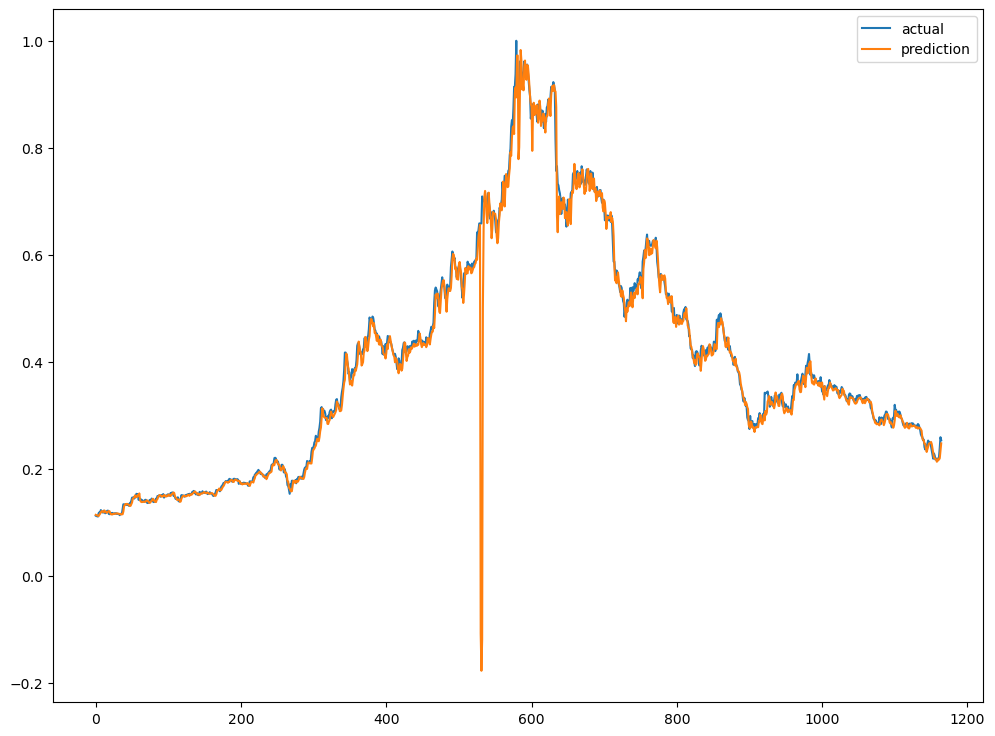

In [152]:
plt.figure(figsize=(12, 9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [161]:
# 스케일링된 주가가 나와버렸다. 주가가 0에서 1사이로 나와버렸다. 주가를 원래대로 되돌리고 싶다.
# 그렇다면 스케일러를 다시 불러와야 한다. 
scaler.inverse_transform(pred)
# 최초 투입차원이 5차원이라서 작동하지 않는 모양이다. 
# 차원을 5차원으로 늘려보자.

ValueError: non-broadcastable output operand with shape (1165,1) doesn't match the broadcast shape (1165,5)

In [158]:
pd.DataFrame(pred)

,0
0,0.114350
1,0.113745
2,0.113125
3,0.112623
4,0.112234
...,...
1160,0.219204
1161,0.217700
1162,0.220061
1163,0.234032


In [171]:
df = pd.DataFrame(scaled, columns=cols)                            
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",axis = 1),df['Close'], test_size=0.2, random_state=0, shuffle=False) 

In [175]:
xtest[20:].shape

(1165, 4)

In [179]:
vsta = np.hstack([xtest[20:],pred])                                  # 수평스택, 옆으로 합치기

In [186]:
df = pd.DataFrame(scaled, columns=cols)                            
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",axis = 1),df['Close'], test_size=0.2, random_state=0, shuffle=False)
vsta = np.hstack([xtest[20:],pred])
ans = scaler.inverse_transform(vsta)
ans2 = ans[:,1]  # 답안이다. 
ans2[-20:]

array([43200., 44000., 43650., 43900., 44050., 42950., 41400., 40150.,
       38900., 39700., 39650., 38500., 38050., 38400., 38950., 38300.,
       38600., 41550., 44700., 44750.])

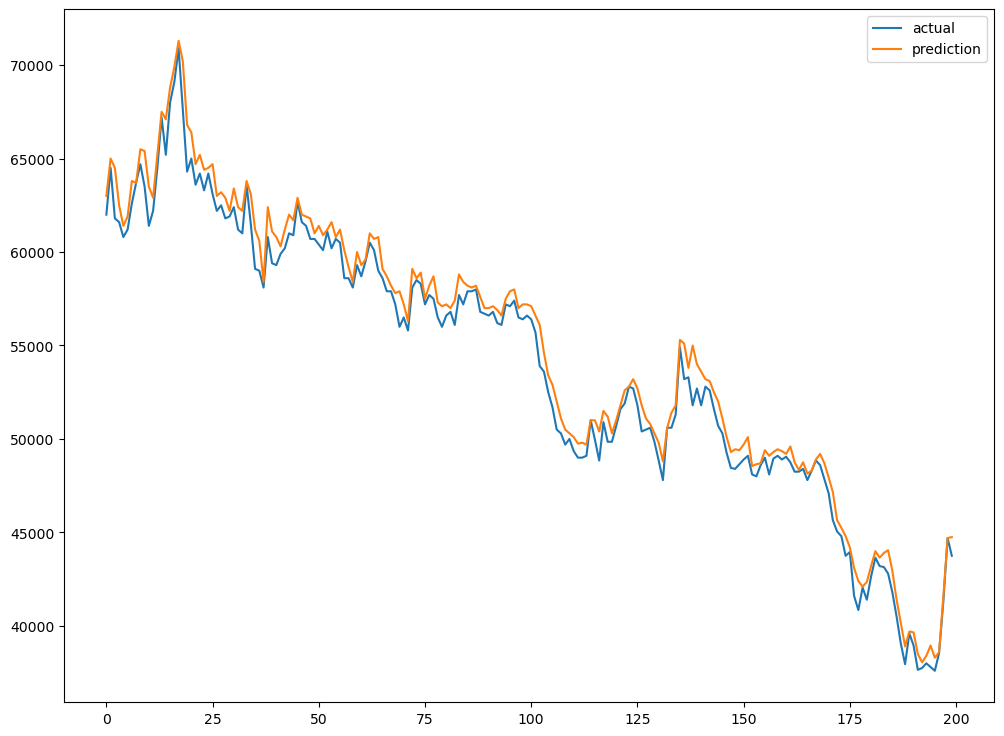

Date
2023-10-11    42650
2023-10-12    43650
2023-10-13    43200
2023-10-16    43150
2023-10-17    42800
2023-10-18    41800
2023-10-19    40500
2023-10-20    39050
2023-10-23    37950
2023-10-24    39600
2023-10-25    38950
2023-10-26    37650
2023-10-27    37750
2023-10-30    38000
2023-10-31    37800
2023-11-01    37600
2023-11-02    38550
2023-11-03    41300
2023-11-06    44700
2023-11-07    43750
Name: Close, dtype: int64

In [194]:
plt.figure(figsize=(12, 9))
plt.plot(ans3, label='actual')
plt.plot(ans2[-200:], label='prediction')
plt.legend()
plt.show()
kakao['Close'][-20:]

In [193]:
ans3=np.array(kakao['Close'][-200:])

In [ ]:
# 문제는 벨류값이 지정되어있지 않다. 벨리데이션 데이터를 따로 넣어야 한다. 
# 위와 같이 벨리데이션 데이터를 따로 투입했다. 

In [44]:
# 일정기간을 묶어서 훈련하는 식으로 해보면 어떨까?
# 모델을 만들기 전에 구조를 먼저 파악해야 한다. 
# https://wikidocs.net/22886
# 여기에 자세히 나와있다.
# hidden_units는 출력차원이다. 히든 상태의 크기를 말하는 것이다. 
# 만약 input을 한다면 유닛, 인풋값을 투입하게 된다. timesteps는 기간, input_dim은 기간별 투입요소이다. 
# timesteps가 3이고 input_dim이 4인 케이스이다. close가 답이기 때문이다. 
# 그리고 출력은 맨 마지막에서만 이루어지면 된다. 다 : 1구조이다. 
# input_dim은 1차원일때 쓴다. 
# input_shape는 인풋값이 1차원을 초과할때 쓴다. 
# 결론적으로 RNN에서 배치사이즈, 타입스텝, 인풋 순으로 설계를 한다. 

# return_sequences = True 이 여부는 상당히 중요하다. 만약 False로 하면 1개만 출력된다.
# 하지만 True로 하는 순간 각각의 RNN에서 출력이 이루어진다. 
# 은닉상태에서 출력은 두 가지의 출력이 이루어진다. 최종에만리턴을 한다면 배치사이즈, 아웃풋만 입력한다.
# 하지만 모든 시퀀스를 추출하려면 배치사이즈, 시간, 아웃풋의 3개를 사용해야 한다.
# 아웃풋 출력 디멘젼의 의미는 한 배치당 이루어진 속성값들을 정해진 갯수의 아웃풋 값으로 표현된 것이다. 
# 배치사이즈가 16이면 아웃풋은 (16,2) 이런 식으로 나올 수 있다.
# 여기서 F.C(풀리 커넥티드)가 작용해서 학습이 계속 이뤄진다. 
# return_sequences가 False인 경우 모든 시퀀스를 구성하는데 최종것만 제외하고 전부 날린다는 거다. 하나빼고
# True는 모든 결과를 도출한다. 도출결과는 hidden_units에서 결정 가능하다.
# 만약 번역기를 쓴다면 모든 결과가 나와야 하기 때문에 True가 나와야 한다. 
# 긍정/부정을 출력한다면 False가 되어야 한다. False는 결론을 원할 때 쓴다. 


In [ ]:
model = Sequential() # 비어있는 방. 비어있는 식당. 아무것도 없음.
model.add(SimpleRNN(3, input_shape=(2,10)))  # 물건구매해서 인테리어 하는 과정
# 출력 = 요리 메뉴 종류
# RNN 주방 가스렌지, 오븐, 냉장고, 밥솥
# 타임스텝 = 업무한 시간
# 인풋 디멘전 = 투입한 재료

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))       # 출력 3, 타임스텝 2, 인풋 디멘젼 10이라는 의미이다. 
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

# 구조는 이런 식으로 되어진다. 
# (이전출력)
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | R  |
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | N  |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | N  |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 |    |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 |    |
#
# 배치사이즈가 현재 단계에서 알 수 없으면 (None,3) 이런식으로 출력된다. 결과가 저렇게 나온 이유이다. 
# 그리고 return_sequences = False가 디폴트다. True로 설정할 필요가 있다면 별도로 지정해야한다.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(5,3,4)))
model.summary()
# 학습을 할때 이걸 하나만 가지고 학습을 하는 경우 배치사이즈는 1이다. 그러면 None이 표시되지 않는다. 
# 3일씩 계산하고 4개의 요소값을 투입하는 것을 1배치라고 가정했을때 5배치로 설정 
# 아웃풋은 3개로 정하고 출력하였음.  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (5, 3)                    24        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()
# return_sequences=True 모든 시퀀스에서 아웃풋이 이루어졌다.
# 2일 10인풋 8배치 기준 아웃풋 3개 출력. 이번건 3개 다 출력

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# 원리를 먼저 알아보자. 
# 기간은 10일이고 투입은 4차원, 출력은 8차원이다.
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))
inputs
# 처음 편성은 이렇게 된다. 랜덤한 숫자들이 추출되었다.

array([[0.33909239, 0.2612449 , 0.82533687, 0.19609386],
       [0.68618799, 0.48644259, 0.50857979, 0.68471039],
       [0.44533163, 0.48511194, 0.69712905, 0.62662547],
       [0.38552143, 0.85131895, 0.8899479 , 0.54997682],
       [0.71173393, 0.52645818, 0.95368882, 0.04561916],
       [0.98908234, 0.61919503, 0.30734349, 0.28439723],
       [0.54110612, 0.60068586, 0.18854901, 0.41565693],
       [0.70460071, 0.12804476, 0.41473999, 0.98234836],
       [0.72311173, 0.88003042, 0.47600184, 0.21980385],
       [0.36454669, 0.61708648, 0.53180614, 0.44228519]])

In [52]:
# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)
# 여기서 출력되는 것은 먼저 0으로 아무것도 없게 만든다. 

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
Wx = np.random.random((hidden_units, input_dim))     # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units))  # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,))                # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [54]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.86348361 0.91078909 0.92445596 0.95489982 0.90009955 0.93100502
  0.90185991 0.96438085]
 [0.99976946 0.99985918 0.99984059 0.99995234 0.99952181 0.9999649
  0.99983878 0.99996917]
 [0.99984611 0.99990494 0.99987151 0.99996955 0.99957211 0.99997772
  0.99988578 0.99998229]
 [0.99991458 0.99992523 0.99993731 0.99998562 0.99965084 0.99998215
  0.99989765 0.99998928]
 [0.99980996 0.99988118 0.9999077  0.99997733 0.99920827 0.99998762
  0.99992579 0.99998433]
 [0.99985671 0.99989662 0.99992917 0.99997598 0.99952133 0.99998714
  0.99993075 0.99997763]
 [0.99981939 0.99986087 0.99985459 0.99995611 0.99933587 0.99997172
  0.99985187 0.9999601 ]
 [0.99980776 0.99991938 0.99982602 0.99995368 0.99973945 0.9999787
  0.9999098  0.99998037]
 [0.99989232 0.99989708 0.99994158 0.99998222 0.99946848 0.99998485
  0.99991044 0.99998054]
 [0.99983466 0.99987547 0.99985912 0.9999645  0.99936209 0.99997224
  0.99984926 0.99997283]]


In [1]:
# 양방향 순환 신경망은 이전시점, 이후시점 둘 다 사용하는것과 같다. 
# https://keras.io/api/layers/recurrent_layers/simple_rnn/
# 이 사이트에서 자세한 사항을 확인할 수 있다. 
# 3d텐서라는 말이 어렵게 들릴 수 있다. 텐서는 벡터를 표시한 것을 말한다. 
# 3d텐서는 3d 세계에서의 움직임이다. 3d 형식의 벡터의 움직임을 수치화한것이다. 

In [2]:
# 깊은 순환 신경망
# RNN구조가 2중 이상으로 된 구조이다. 은닉층이 2개 이상인 깊은 순환 신경망이다. 
# 문제는 1층의 은닉층은 전부 리턴이 되어야 한다. 그래서 return_sequences가 1층은 무조건 True로 설정된다.
# 마지막 층(맨 윗층)은 False로 반환해도 상관없다. 마지막에서만 출력한다면 return을 하지 않아도 된다. 
# 깊은 순환 신경망을 쓰는 이유는 단순한 데이터에 비해 데이터의 내부구조가 복잡할때 사용한다.
# 즉 주식투자, 선물투자와 같은 정보가 한정되어있는데 내부에 많은 데이터가 함유되어있는 경우에 사용된다.

In [3]:
# 양방향 순환 신경망 bidirectional
# 과거시점의 입력 뿐 아니라 미래 시점의 입력에 힌트가 있다고 판단하는 경우 사용한다.
# 트랜스포머 알고리즘이 이러한 방식을 사용한다. 
# 현재 시점의 출력층에서 출력값을 예측하기 위해 사용한다. 
# 깊은 양방향 순환 신경망도 만들 수 있다. 다만 컴퓨터 터뜨려먹기에 매우 좋다. 
# 차라리 코랩에서 하는 것이 낫다. 

In [5]:
# RNN 언어모델(RNNLM) 
# RNNLM이라고 한다. LM은 (language model)을 말한다. LLM은 대형 언어모델이다. 
# 이러한 언어모델을 만들고 기업들에게 쓰라고 배포하는 식이다. 
# 훈련 코퍼스(말뭉치,문장 데이터,특정분야의 단어집합)를 하나 받았다고 해보자. 
# 'what will the fat cat sit on'
# 언어모델은 현재의 언어로부터 다음 단어를 예측하는 모델이다. 
# 이전 시점의 출력은 현재 시점의 입력이 된다. 그리고 다음 시점의 출력으로 바뀐다.
#
# 이전 시점              현재시점                 다음시점
#  what will the -----> what will the
#      출력됨               입력됨
#                       fat cat ----------------> fat cat
#                        출력됨                    입력됨
# 
# 이런 식으로 이어진다.
# 문제는 한번 틀리면 그 뒤에는 싸그리 틀려버린다. 마치 고요 속의 외침과 비슷하다.
# 훈련할 때는 정답을 줘야 한다. 교사강요(teacher forcing)를 통해 훈련시킨다.
# 훈련할 때 t+1을 입력으로 사용하지 않고 정답을 투입하여 입력한다. 
# 즉 답을 내놓는 것을 멋대로 내놓게 하지 않고 무조건 답을 투입한다. 
# 이처럼 훈련과정과 테스트 과정이 다르다. 
# 출력은 범주화된 자료를 보내기 때문에 소프트맥스 함수로 활성화함수, 크로스엔트로피로 손실함수를 쓴다.
# 소프트맥스 함수는 합이 1인 확률이다. 확률로 바뀐 값들 중에서 최댓값에 해당하는 결과가 예측단어가 된다.
# 전체 오차를 줄이기 위해서 모든 가중치에 대한 업데이트를 한다(백 프라퍼게이션 이후)

In [6]:
# RNN 텍스트 생성
# 만약 '경마장에 있는 말이 뛰고 있다. 그의 말이 법이다. 가는 말이 고와야 오는 말이 곱다.'
# 세 문장이 존재한다. 모델이 문맥을 학습한다면 11개의 샘플이 만들어진다. 
#        입력                    출력
# 1. 경마장에                    있는
# 2. 경마장에 있는               말이
# 3. 경마장에 있는 말이          뛰고
# 4. 경마장에 있는 말이 뛰고     있다.
# 5. 그의                        말이
# 6. 그의 말이                   법이다.
# 7. 가는                        말이
# 8. 가는 말이                   고와야
# 9. 가는 말이 고와야            오는
# 10. 가는 말이 고와야 오는      말이
# 11. 가는 말이 고와야 오는 말이 곱다.
# 
# 이런 식으로 구성이 된다. 
# 실습을 통해서 확인해보자. 

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer          # 언어 토큰화
from tensorflow.keras.preprocessing.sequence import pad_sequences  # 인풋 데이터 길이 조절, 잘라내거나 붙이거나 해서 동일한 길이로 인풋시키는 용도
from tensorflow.keras.utils import to_categorical                  # 원핫인코딩을 위한 카테고리화 모듈

In [8]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [9]:
tokenizer = Tokenizer()                     # 토큰화 모듈을 호출했다. 
tokenizer.fit_on_texts([text])              # 토큰화 모듈은 텍스트에 맞게 적합화되었다. 
vocab_size = len(tokenizer.word_index) + 1  # 토큰화 모듈 길이에 1을 더했다. 
print('단어 집합의 크기 : %d' % vocab_size) # 집합크기가 12개이다. 뭔가 이상하다. 

단어 집합의 크기 : 12


In [10]:
tokenizer.word_index                        # 0번을 사용하지 않는다. 이것때문에 1을 붙인 듯 하다.
                                            # 1을 추가하지 않으면 11번이 사라지기에 1을 더했다.

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [11]:
tokenizer.index_word                         # 인덱스가 바뀌었다. 워드 인덱스와 인덱스 워드는 다르다.

{1: '말이',
 2: '경마장에',
 3: '있는',
 4: '뛰고',
 5: '있다',
 6: '그의',
 7: '법이다',
 8: '가는',
 9: '고와야',
 10: '오는',
 11: '곱다'}

In [22]:
sequences = list()                                      # 비어있는 리스트 출력
for line in text.split('\n'):                           # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]   # 텍스트 시퀀스가 문장을 숫자로 변환시켜서 인코딩된다.(2,3,4,1,5로 인코딩된다)
    for i in range(1, len(encoded)):                    # 1부터 4까지를 구간으로 둔다. 
        sequence = encoded[:i+1]                        # 처음에는 [2,3]이 추출된다. 다음에는 다음순서대로 투입된다. 
        sequences.append(sequence)                      # [[2,3],[2,3,1],[2,3,1,4],[2,3,1,4,5]] 순으로 추출될 것이다.

print('학습에 사용할 샘플의 개수: %d' % len(sequences))
# RNN 내부에 투입되는 요소는 문자로 투입할 수 없다. 숫자로 변환해야 투입할 수 있다. 
# 인코디드에 [0]을 쓴 이유는 이중 리스트라서 리스트 하나를 제거하기 위함이다. 

학습에 사용할 샘플의 개수: 11


In [23]:
sequences
# 이런 식으로 시퀀스가 채워질 것이다. 
# 이것이 내가 학습하고자 하는 데이터셋이다. 
# 입력길이가 상당히 길다. 6개가 최대치이다.
# 우리는 답을 맨 뒷 인덱스만 원한다. 3,1,4,5,...11 순으로 우리가 원하는 답이 나온다.
# 모든 곳에서 출력을 해야한다. 하지만 행 기준으로는 1개만 출력되야 한다. 
# 그래서 하나하나 계산할 경우에는 맨 마지막 단어만 추출되어야 한다. 


[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [24]:
max_len = max(len(l) for l in sequences)      # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [25]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences # 인풋의 길이는 다음과 같이 동일하게 이루어질 것이다. 
# 맨 앞의 데이터 5개가 x데이터, 뒤에 있는 숫자들이 y 데이터일 것이다. 
# 출력을 할 경우 0까지 포함해서 12차원을 출력할 것이다. 
# 11개가 확률로 나올 것이다. 애러가 나오면 역전파(백프라퍼게이트)를 하면서 업데이트를 할 것이다. 

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [21]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
sequences # 인풋의 길이는 다음과 같이 동일하게 이루어질 것이다. 
# 참고로 패딩 속성을 post로 주면 숫자는 앞에서부터 정렬될 것이다. 
# 문제는 0까지 학습을 하기 때문에 패딩으로 인해서 문제가 발생할 수 있다. 


array([[ 2,  3,  0,  0,  0,  0],
       [ 2,  3,  1,  0,  0,  0],
       [ 2,  3,  1,  4,  0,  0],
       [ 2,  3,  1,  4,  5,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 6,  1,  7,  0,  0,  0],
       [ 8,  1,  0,  0,  0,  0],
       [ 8,  1,  9,  0,  0,  0],
       [ 8,  1,  9, 10,  0,  0],
       [ 8,  1,  9, 10,  1,  0],
       [ 8,  1,  9, 10,  1, 11]])

In [26]:
sequences = np.array(sequences)
X = sequences[:,:-1]              # 앞의 5칸을 x로 확안하였다.
y = sequences[:,-1]               # 6번째칸을 y로 확인하였다.

In [28]:
y = to_categorical(y, num_classes=vocab_size)

In [29]:
y # 원핫 인코딩을 이용하여 정리하였다. 

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [31]:
embedding_dim = 10                                             # 임베딩 차원이 10차원이다. 첫번째차원을 버리고 두번째부터 쓰겠다는 것이다
hidden_units = 32                                              # 히든유닛은 중간 히든계층의 출력사이즈이다.
# 임베딩은 단어를 벡터공간에 표현하는 것이다. 

model = Sequential()                                           # 먼저 딥러닝 모델을 정의한다. 
model.add(Embedding(vocab_size, embedding_dim))                # 보켑 사이즈가 12였다. 0번째를 제외하면 11이다. 
                                                               # 12차원 데이터를 10차원 공간으로 표현하라는 의미이다.
                                                               # 사실 반드시 12차원을 10차원으로 줄여야한다는 법은 없다. 
                                                               # 임베딩 클래스에 대한 예를 들기 위함이었다. 학습속도를 개선하기 위함이다. 
model.add(SimpleRNN(hidden_units))                             # 중간 히든계층이다.
model.add(Dense(vocab_size, activation='softmax'))             # 소프트맥스로 나눠서 출력한다. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)                         # 출력 2형태, 200번 반복, x,y로 훈련
# 모델이 100퍼센트까지 나왔다. 

Epoch 1/200
1/1 - 1s - loss: 2.4745 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4600 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4455 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4308 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4159 - accuracy: 0.2727 - 4ms/epoch - 4ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4007 - accuracy: 0.2727 - 4ms/epoch - 4ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3850 - accuracy: 0.2727 - 4ms/epoch - 4ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3688 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3520 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3345 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3164 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 2.2975 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2778 - accuracy: 0.3636 - 5

Epoch 105/200
1/1 - 0s - loss: 0.7005 - accuracy: 0.7273 - 4ms/epoch - 4ms/step
Epoch 106/200
1/1 - 0s - loss: 0.6883 - accuracy: 0.7273 - 4ms/epoch - 4ms/step
Epoch 107/200
1/1 - 0s - loss: 0.6763 - accuracy: 0.7273 - 4ms/epoch - 4ms/step
Epoch 108/200
1/1 - 0s - loss: 0.6645 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 109/200
1/1 - 0s - loss: 0.6527 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 110/200
1/1 - 0s - loss: 0.6411 - accuracy: 0.7273 - 3ms/epoch - 3ms/step
Epoch 111/200
1/1 - 0s - loss: 0.6296 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 112/200
1/1 - 0s - loss: 0.6183 - accuracy: 0.8182 - 4ms/epoch - 4ms/step
Epoch 113/200
1/1 - 0s - loss: 0.6071 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 114/200
1/1 - 0s - loss: 0.5960 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 115/200
1/1 - 0s - loss: 0.5850 - accuracy: 0.9091 - 4ms/epoch - 4ms/step
Epoch 116/200
1/1 - 0s - loss: 0.5742 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 117/200
1/1 - 0s - loss: 0.5635 - 

In [60]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word                                # 기존 단어/ 문장
    sentence = ''                                           # 앞으로 붙일 문장(빈 상태로 생성)
    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]   # 텍스트를 시퀀스로 변환하기(숫자)
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 숫자를 기준으로 패딩을 함.길이는 전부 동일
        print(encoded[0])
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)                  # 시퀀스를 모델에 투입
        result = np.argmax(result, axis=1)                          # 모델 확률중 가장 큰 확률값을 결과로 반환

        for word, index in tokenizer.word_index.items():            # 토큰 요소 중 단어인덱스를 추출
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break 
            if index == result:                                     # 인덱스가 만약 결과값과 똑같으면
                break                                               # 끝내기.

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word                   # 워드는 예측단어이다. 아까의 result랑 같은 결과다.
        print(current_word)
        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word                            # 최종단계가 아니면 여기에 저장해놓는다. 
        print(sentence)
    sentence = init_word + sentence                                 # 기존 단어/문장
    return sentence                                                 # 예측된 단어가 붙은 문장

In [61]:
print(sentence_generation(model, tokenizer, '경마장에', 4)) # 꽤 잘 되었다. 
# 다만 추가로 출력한다면 말이 매우 이상해질것이다. 기존에 훈련된 것만 잘 할 것이다. 
# 또는 첫 마디가 아닌 중간마디로 시작하면 말이 이상하게 꼬인다.
# 만약 '고와야'라는 말을 집어넣으면 꼬일 것이다. 
# '가는 말이'라는 말이 선행되지 않아서 없던 사례취급하기 때문이다. 
# 맨 처음 단어인 '경마장에', '그의','가는'이 안들어가면 정확하지 않는 결과가 나올 수 있다. 
# RNN은 여기서 문제가 발생한다. 
# 위에 프린트 함수를 넣어서 중간과정도 추가하였다. 

[0 0 0 0 2]
경마장에 있는
 있는
[0 0 0 2 3]
경마장에 있는 말이
 있는 말이
[0 0 2 3 1]
경마장에 있는 말이 뛰고
 있는 말이 뛰고
[0 2 3 1 4]
경마장에 있는 말이 뛰고 있다
 있는 말이 뛰고 있다
경마장에 있는 말이 뛰고 있다


In [62]:
# 새로 받은 파일은 케글에 올라온 뉴스 파일이다. 
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [63]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [64]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [65]:
print(df['headline'].isnull().values.any()) # 일단 결측값은 없다. unknown으로 되어있는건 일단 무시하자.

False


In [66]:
df.headline # 제목이 시리즈 구조로 나온다. 

0       Former N.F.L. Cheerleaders’ Settlement Offer: ...
1       E.P.A. to Unveil a New Rule. Its Effect: Less ...
2                                 The New Noma, Explained
3                                                 Unknown
4                                                 Unknown
                              ...                        
1319    This Common Question Reinforces the Gender Pay...
1320                                   Anna, Llama and Me
1321           Gen. Michael Hayden Has One Regret: Russia
1322                         There Is Nothin’ Like a Tune
1323                                              Unknown
Name: headline, Length: 1324, dtype: object

In [67]:
df.headline.values # 어레이로 바뀌었다. 

array(['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
       'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
       'The New Noma, Explained', ...,
       'Gen. Michael Hayden Has One Regret: Russia',
       'There Is Nothin’ Like a Tune', 'Unknown'], dtype=object)

In [70]:
headline = []
headline.extend(list(df.headline.values))
headline # 익스텐드로 리스트를 합치는 것을 이용했다. 
# Unknown을 제거해보자.

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [71]:
print('총 샘플의 개수 : {}'.format(len(headline)))
# unknown을 포함한 정보이다. 

총 샘플의 개수 : 1324


In [72]:
headline = [word for word in headline if word != "Unknown"]     # 이런식으로 unknown을 제거한다. 
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))#

노이즈값 제거 후 샘플의 개수 : 1214


In [73]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()  
#  punctuation은 특수문자들이 들어가있다. 특수문자들을 한번에 확인할때 사용한다. 
# 특수문자를 한번에 제가하는 것이다. 
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [75]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [76]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]
# 방금전에 했던 것과 같은 방식으로 이뤄진다. 
# 맨 마지막 단어는 예측하고자 하는 단어이다. 

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [77]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [78]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'for',
 7: 'and',
 8: 'is',
 9: 'on',
 10: 'with',
 11: 'trump',
 12: 'as',
 13: 'at',
 14: 'new',
 15: 'how',
 16: 'from',
 17: 'it',
 18: 'an',
 19: 'that',
 20: 'be',
 21: 'season',
 22: 'us',
 23: 'you',
 24: 'its',
 25: 'what',
 26: 'episode',
 27: 'can',
 28: 'your',
 29: 'not',
 30: 'he',
 31: 'now',
 32: 'his',
 33: 'are',
 34: 'teaching',
 35: 'war',
 36: 'out',
 37: 'no',
 38: 'was',
 39: 'by',
 40: 'trumps',
 41: 'has',
 42: 'over',
 43: 'may',
 44: 'into',
 45: 'why',
 46: 'more',
 47: 'we',
 48: 'who',
 49: 'about',
 50: 'recap',
 51: 'activities',
 52: '1',
 53: 'just',
 54: 'do',
 55: 'women',
 56: 'when',
 57: 'syria',
 58: 'trade',
 59: 'i',
 60: '2',
 61: 'or',
 62: 'will',
 63: 'this',
 64: 'have',
 65: 'president',
 66: 'but',
 67: 'home',
 68: 'up',
 69: 'long',
 70: 'one',
 71: 'off',
 72: 'facebook',
 73: 'house',
 74: 'gop',
 75: 'our',
 76: 'case',
 77: 'they',
 78: 'life',
 79: 'end',
 80: 'right',
 81: 'so

In [79]:
sequences # 입력단어와 출력단어가 같은 방식으로 묶여있다. 
# 인풋길이는 어떻게 하는 게 좋을까?
# 최대길이에 해당하는 값을 출력해볼까?

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3],
 [100, 3, 1117],
 [100, 3, 1117, 2],
 [100, 3, 1117, 2, 14],
 [100, 3, 1117, 2, 14, 583],
 [100, 3, 1117, 2, 14, 583, 24],
 [100, 3, 1117, 2, 14, 583, 24, 1118],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5, 1119],
 [1, 14],
 [1, 14, 1120],
 [1, 14, 1120, 1121],
 [15, 2],
 [15, 2, 584],
 [15, 2, 584, 4],
 [15, 2, 584, 4, 215],
 [15, 2, 584, 4, 215, 375],
 [15, 2, 584, 4, 215, 375, 1122],
 [15, 2, 584, 4, 215, 375, 1122, 2],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376, 

In [80]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))
# 최대 길이는 24이다. 모든 길이를 24로 맞추고 해보자. 

샘플의 최대 길이 : 24


In [81]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [82]:
sequences# 앞이 전부 0으로 채워졌다. 

array([[   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       [   0,    0,    0, ...,  269,  371, 1115],
       ...,
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2],
       [   0,    0,    0, ...,  115,    2, 1025]])

In [83]:
sequences = np.array(sequences)      # 모델 훈련에는 배열로 투입해야 한다. 아니면 애러난다. 
X = sequences[:,:-1]
y = sequences[:,-1]            

In [84]:
X

array([[   0,    0,    0, ...,    0,    0,   99],
       [   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       ...,
       [   0,    0,    0, ...,  170,    8, 3493],
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2]])

In [86]:
y # 이녀석은 이제 원핫 인코딩을 해줘야 한다. 

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [87]:
vocab_size# 원핫 인코딩을 하면 이런 식으로 3400개의 항목이 나온다. 

3494

In [88]:
y = to_categorical(y, num_classes=vocab_size)

In [90]:
y.shape # 행은 학습 데이터의 크기이다. 
# 정답에 해당되는 7803개의 단어. 각 단어는 3494차원으로 원핫 인코딩 되어있다. 

(7803, 3494)

In [91]:
X.shape # 인풋모양은 학습데이터마다 23개씩이다. 나머지 1개는 정답부이다. 
# 출력은 3494개 중 가장 확률 높은 것을 출력할 것이다. 
# 임베딩을 통해 차원을 줄여야 할 듯 하다. 


(7803, 23)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [93]:
embedding_dim = 10
hidden_units = 128

model = Sequential()                                   # 모델 제작
model.add(Embedding(vocab_size, embedding_dim))        # 3494차원 투입, 10차원으로 전환
model.add(LSTM(hidden_units))                          # lstm 히든유닛은 128차원을 출력한다. 
model.add(Dense(vocab_size, activation='softmax'))     # 풀리 커넥티드, 출력 = 3494개 중 한개, 소프트맥스 기준
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 5s - loss: 7.6621 - accuracy: 0.0259 - 5s/epoch - 21ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1220 - accuracy: 0.0314 - 3s/epoch - 12ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9882 - accuracy: 0.0320 - 3s/epoch - 11ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8766 - accuracy: 0.0396 - 3s/epoch - 11ms/step
Epoch 5/200
244/244 - 3s - loss: 6.7477 - accuracy: 0.0425 - 3s/epoch - 11ms/step
Epoch 6/200
244/244 - 4s - loss: 6.5902 - accuracy: 0.0446 - 4s/epoch - 15ms/step
Epoch 7/200
244/244 - 3s - loss: 6.4162 - accuracy: 0.0505 - 3s/epoch - 13ms/step
Epoch 8/200
244/244 - 3s - loss: 6.2297 - accuracy: 0.0545 - 3s/epoch - 12ms/step
Epoch 9/200
244/244 - 3s - loss: 6.0443 - accuracy: 0.0581 - 3s/epoch - 12ms/step
Epoch 10/200
244/244 - 3s - loss: 5.8605 - accuracy: 0.0641 - 3s/epoch - 11ms/step
Epoch 11/200
244/244 - 3s - loss: 5.6813 - accuracy: 0.0668 - 3s/epoch - 11ms/step
Epoch 12/200
244/244 - 3s - loss: 5.5127 - accuracy: 0.0729 - 3s/epoch - 11ms/step
Epoch 13/200


Epoch 100/200
244/244 - 3s - loss: 0.6162 - accuracy: 0.8791 - 3s/epoch - 12ms/step
Epoch 101/200
244/244 - 3s - loss: 0.5997 - accuracy: 0.8838 - 3s/epoch - 12ms/step
Epoch 102/200
244/244 - 3s - loss: 0.5890 - accuracy: 0.8838 - 3s/epoch - 12ms/step
Epoch 103/200
244/244 - 3s - loss: 0.5746 - accuracy: 0.8865 - 3s/epoch - 12ms/step
Epoch 104/200
244/244 - 3s - loss: 0.5614 - accuracy: 0.8890 - 3s/epoch - 12ms/step
Epoch 105/200
244/244 - 3s - loss: 0.5492 - accuracy: 0.8907 - 3s/epoch - 12ms/step
Epoch 106/200
244/244 - 3s - loss: 0.5386 - accuracy: 0.8943 - 3s/epoch - 12ms/step
Epoch 107/200
244/244 - 3s - loss: 0.5265 - accuracy: 0.8959 - 3s/epoch - 12ms/step
Epoch 108/200
244/244 - 3s - loss: 0.5158 - accuracy: 0.8961 - 3s/epoch - 12ms/step
Epoch 109/200
244/244 - 3s - loss: 0.5079 - accuracy: 0.8994 - 3s/epoch - 12ms/step
Epoch 110/200
244/244 - 3s - loss: 0.5046 - accuracy: 0.8980 - 3s/epoch - 12ms/step
Epoch 111/200
244/244 - 3s - loss: 0.4866 - accuracy: 0.9020 - 3s/epoch - 12

Epoch 198/200
244/244 - 3s - loss: 0.2620 - accuracy: 0.9152 - 3s/epoch - 12ms/step
Epoch 199/200
244/244 - 3s - loss: 0.2611 - accuracy: 0.9164 - 3s/epoch - 12ms/step
Epoch 200/200
244/244 - 3s - loss: 0.2624 - accuracy: 0.9158 - 3s/epoch - 12ms/step


In [94]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [95]:
print(sentence_generation(model, tokenizer, 'i', 10))

i cant jump ship from facebook yet house was shot it


In [96]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make facebook more accountable cut support in a pulitzer


In [ ]:
# RNN을 이용해서 텍스트 출력하기
